# Задание №5
# Описание проекта
Мы работаем в газете “Метро”. Редактор прислал на эту таблицу и поручил сделать наброски для статьи “Где жить хорошо: 5 фишек разных стран” с диаграммами. 
# Задача:
- Проанализировать эти данные, 
- Выделить для себя какие-то фишки.
- Сделать наглядные диаграммы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
df = pd.read_csv('\datasets\Cost_of_Living_Index_2022.csv')
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [3]:
df.info()
# проверка на наличие дубликатов
print('Дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB
Дубликатов: 0


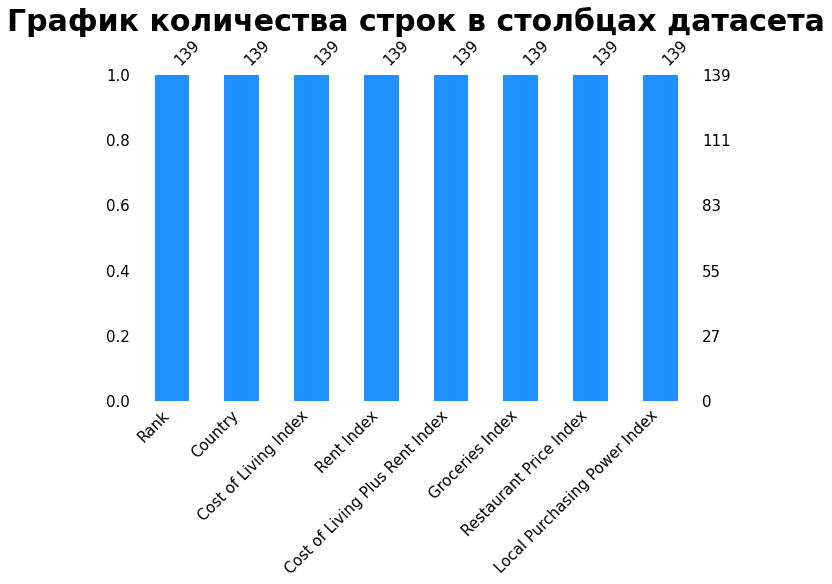

In [4]:
# График количества пропущенных значений
missingno.bar(df, color='dodgerblue', figsize=(10,6), fontsize=15)
plt.title('График количества строк в столбцах датасета', fontsize=30, fontweight='bold')
plt.show()

In [5]:
((df['Cost of Living Index'] + df['Rent Index']) / 2 / df['Cost of Living Plus Rent Index']).describe().round(3)

count    139.000
mean       0.970
std        0.009
min        0.954
25%        0.964
50%        0.969
75%        0.974
max        1.005
dtype: float64

Из полученных вычислений видно, что так называемый суммарный индекс стоимости жизни и аренды высчитан как-то странно:
- Он не равен сумме индексов в него включенных.
- Так же он не равен половине суммы.<br>

Не понятно как он высчитан и для чего.

In [6]:
# Количество стран где аренда дороже стоимости жизни
rent_more_living = []
for i in range(len(df)):
    if df.loc[i, 'Cost of Living Index'] < df.loc[i, 'Rent Index'] :
        rent_more_living.append(df.loc[i, 'Country'])
print('Количество стран где аренда дороже стоимости жизни:', len(rent_more_living))

Количество стран где аренда дороже стоимости жизни: 1


In [7]:
# Количество стран где питание в ресторане дороже чем продукты
restaurant_more_groceries = []
groceries_more_restaurant = []
restaurant_same_groceries = []
for j in range(len(df)):
    if df.loc[j, 'Restaurant Price Index'] > df.loc[j, 'Groceries Index'] :
        restaurant_more_groceries.append(df.loc[j, 'Country'])
    elif df.loc[j, 'Restaurant Price Index'] < df.loc[j, 'Groceries Index'] :
        groceries_more_restaurant.append(df.loc[j, 'Country'])
    elif df.loc[j, 'Restaurant Price Index'] == df.loc[j, 'Groceries Index'] :
        restaurant_same_groceries.append(df.loc[j, 'Country'])
        
print('Количество стран где питание в ресторане дороже чем продукты:', len(restaurant_more_groceries))
print('Количество стран где питание в ресторане дешевле чем продукты:', len(groceries_more_restaurant))
print('Количество стран где питание в ресторане стоит как продукты:', len(restaurant_same_groceries))

Количество стран где питание в ресторане дороже чем продукты: 51
Количество стран где питание в ресторане дешевле чем продукты: 88
Количество стран где питание в ресторане стоит как продукты: 0


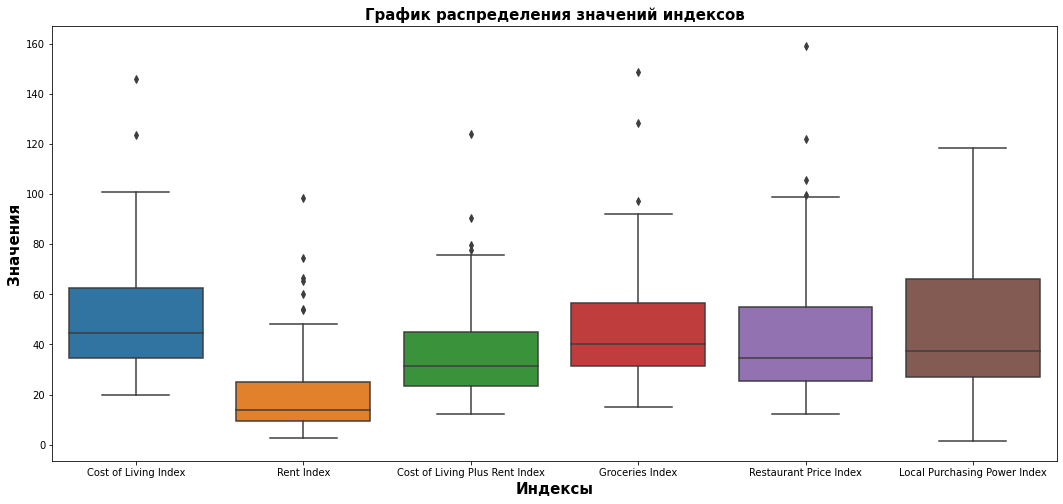

In [8]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[['Cost of Living Index', 
                     'Rent Index', 
                     'Cost of Living Plus Rent Index', 
                     'Groceries Index', 
                     'Restaurant Price Index', 
                     'Local Purchasing Power Index']])
plt.xlabel('Индексы', fontsize = 15, fontweight='bold')
plt.ylabel('Значения', fontsize = 15, fontweight='bold')
plt.title('График распределения значений индексов', fontsize = 15, fontweight='bold')
plt.show()

In [9]:
df[['Cost of Living Index', 
                     'Rent Index', 
                     'Cost of Living Plus Rent Index', 
                     'Groceries Index', 
                     'Restaurant Price Index', 
                     'Local Purchasing Power Index']].describe().round(2)

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.00,139.00,139.00,139.00,139.00,139.00
mean,50.19,19.29,35.71,46.64,43.44,46.43
std,20.86,15.32,17.54,20.95,24.89,26.92
min,19.92,2.72,12.09,14.92,12.41,1.45
25%,34.72,9.52,23.31,31.20,25.29,27.04
50%,44.68,13.93,31.26,40.22,34.56,37.22
75%,62.58,25.07,44.86,56.59,54.92,66.10
max,146.04,98.58,123.80,148.66,159.17,118.44


Распределение значений в индексах довольно разнообразно.

In [10]:
# 10 стран с наивысшим индексом стоимости жизни
cost_of_livivng_high = df.sort_values(by='Cost of Living Index', ascending=False).reset_index(drop= True).head(10)

# 10 стран с наименьшим индексом стоимости жизни
cost_of_livivng_low = df.sort_values(by='Cost of Living Index').reset_index(drop= True).head(10)

# 10 стран с наивысшим индексом аренды
rent_high = df.sort_values(by='Rent Index', ascending=False).reset_index(drop= True).head(10)

# 10 стран с наименьшим индексом аренды
rent_low = df.sort_values(by='Rent Index').reset_index(drop= True).head(10)

# 10 стран с наивысшим индексом стоимости продуктов
groceries_high = df.sort_values(by='Groceries Index', ascending=False).reset_index(drop= True).head(10)

# 10 стран с наименьшим индексом стоимости продуктов
groceries_low = df.sort_values(by='Groceries Index').reset_index(drop= True).head(10)

# 10 стран с наивысшим индексом ресторанов
restaurant_price_high = df.sort_values(by='Restaurant Price Index', ascending=False).reset_index(drop= True).head(10)

# 10 стран с наименьшим индексом ресторанов
restaurant_price_low = df.sort_values(by='Restaurant Price Index').reset_index(drop= True).head(10)

# 10 стран с наивысшим индексом покупательской способности
power_high = df.sort_values(by='Local Purchasing Power Index', ascending=False).reset_index(drop= True).head(10)

# 10 стран с наименьшим индексом покупательской способности
power_low = df.sort_values(by='Local Purchasing Power Index').reset_index(drop= True).head(10)

In [11]:
# Список индексов
Indexes = ['Cost of Living Index', 
           'Rent Index', 
           'Cost of Living Plus Rent Index', 
           'Groceries Index', 
           'Restaurant Price Index', 
           'Local Purchasing Power Index']

In [12]:
# Функция для построения графиков пяти первых стран по индексу  
def graph_high (column, axes):
    df.pivot_table(index = 'Country', values = column).nlargest(5, column).plot(kind='bar', grid=True, 
                                                                                         fontsize = 15, 
                                                                                         legend=False,
                                                                                         ax = axes)
    axes.set_xlabel('Страна', fontsize = 15, fontweight='bold')

# Функция для построения графиков пяти последних стран по индексу  
def graph_small (column, axes):
    df.pivot_table(index = 'Country', values = column).nsmallest(5, column).plot(kind='bar', grid=True, 
                                                                                         fontsize = 15, 
                                                                                         legend=False,
                                                                                         ax = axes)
    axes.set_xlabel('Страна', fontsize = 15, fontweight='bold')

In [13]:
def funk_gr (i):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    fig.suptitle(f"5 первых и 5 последних стран по индексу {Indexes[i]}", fontsize = 20, fontweight='bold')
    graph_high(Indexes[i], axes[0])
    graph_small(Indexes[i], axes[1])

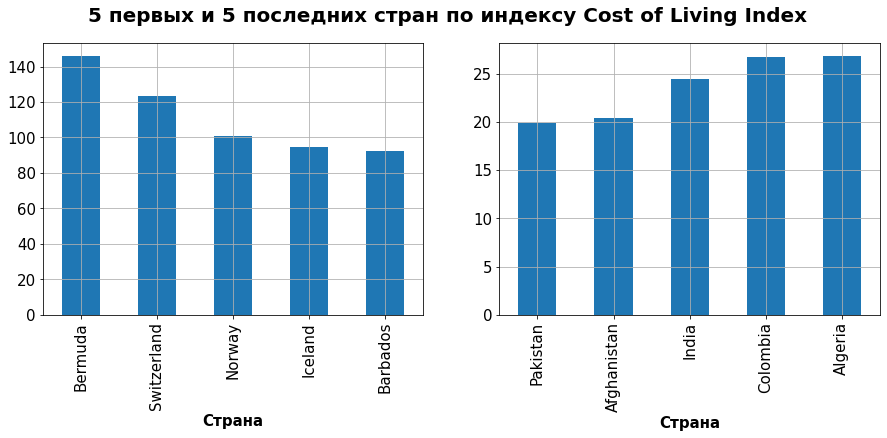

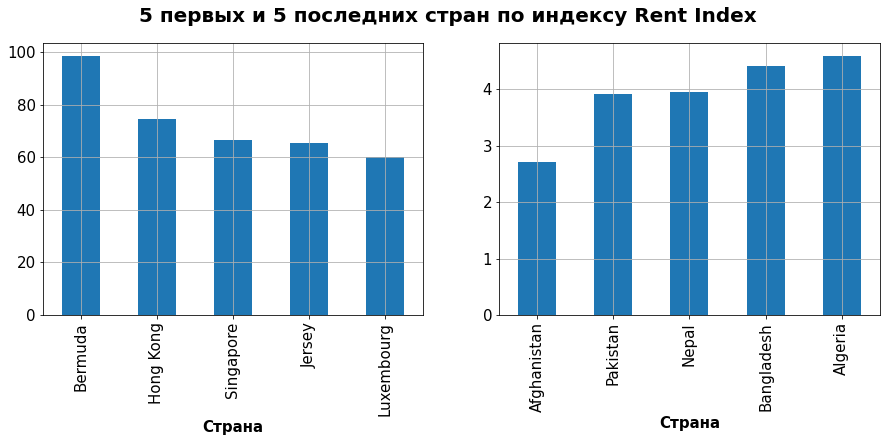

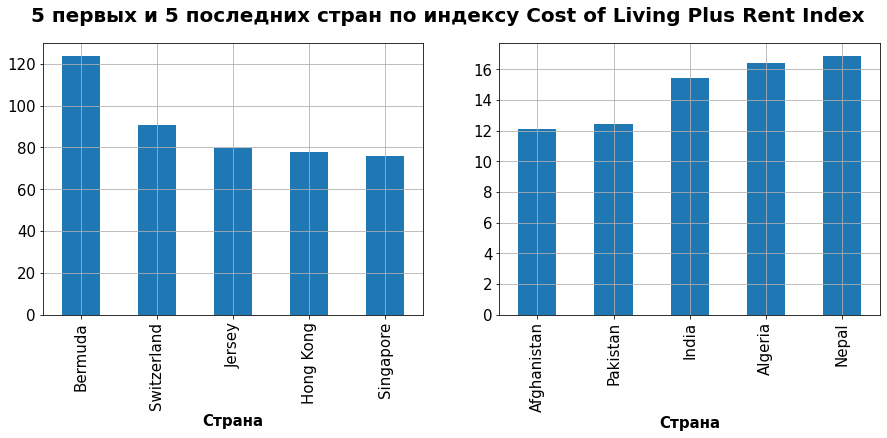

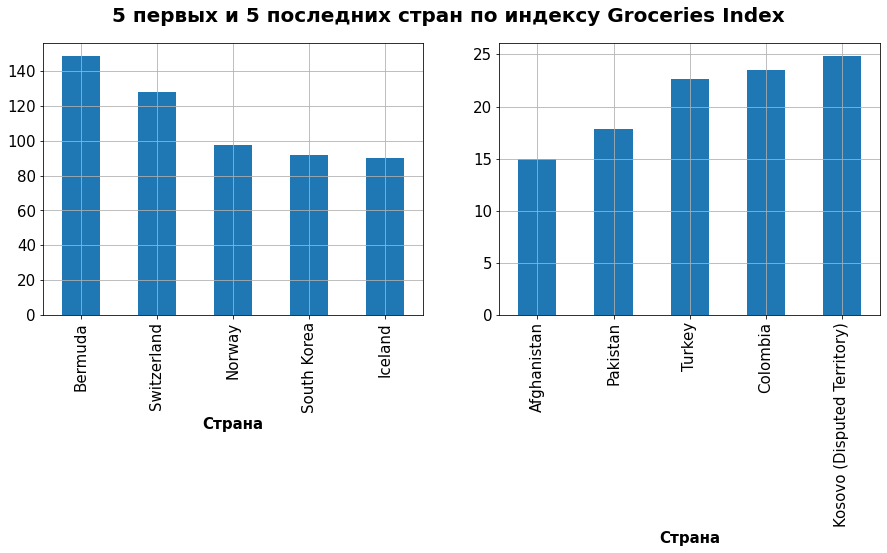

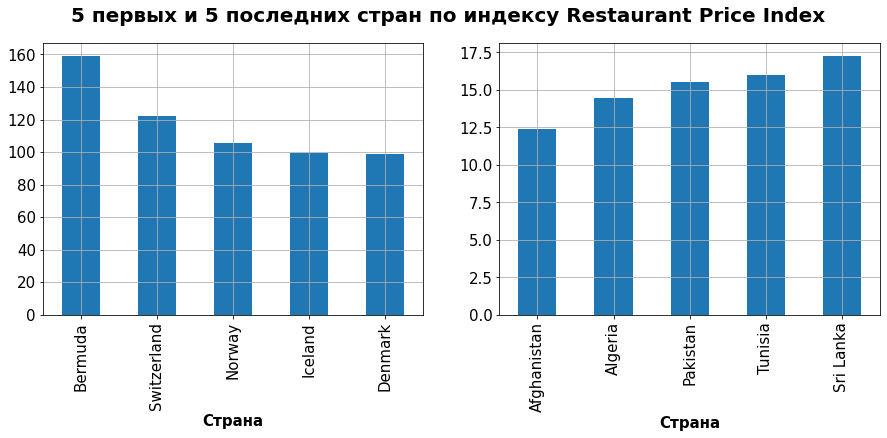

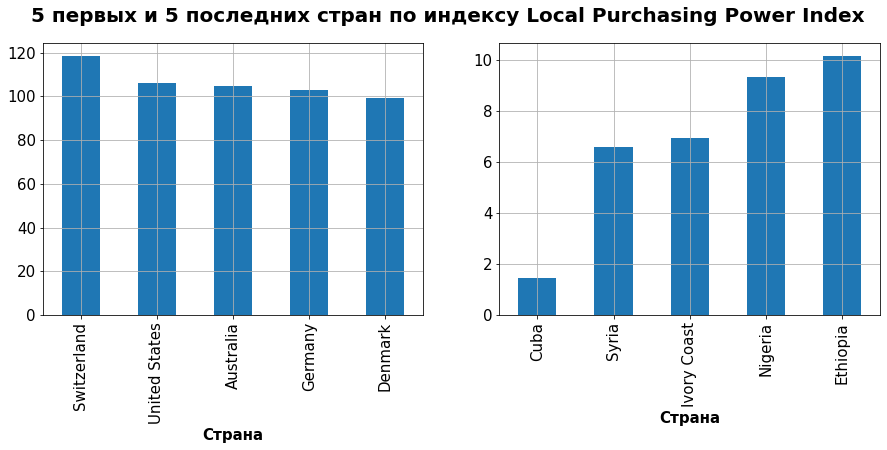

In [14]:
# Построение графиков пяти первых и пяти последних стран по каждому индексу
for i in range(len(Indexes)):
    funk_gr(i)

На Бермудах самая дорогая жизнь, аренда, рестораны, продукты, а вот покупательная способность населения в топ-5 не входит.

В США высокая покупательная способность населения - второе место в мире. Но по остальным показателям они не в топ-5.

Швейцария имеет самую высокую покупательную способность населения. В трех индексах находится на втором месте. И при этом аренда в стране не самая дорогая.

В Норвегии дорогие продукты, рестораны и стоимость жизни - третье место в этих рейтингах. А вот аренда и покупательная способность населения не в топ-5.

В Гонконге и Сингапуре дорогая аренда. В Южной Корее дорогие продукты. Это единственные страны из топ-5.

В Австралии высокая покупательная способность населения. И это единственный рейтинг куда она попала.

В странах с низкими рейтингами находятся страны Африки, Азии и Латинской Америки.

На Кубе покупательная способность населения самая низкая в мире. В 65 раз меньше чем в Швейцарии и в 5 раз ниже чем в Эфиопии. При этом рестораны, продукты, аренда и стоимость жизни не входят в число последних пяти стран по соответствующим рейтингам.

По ресторанам, продуктам, аренде и стоимости жизни аутсайдерами являются Алжир, Афганистан и Пакистан. 

Ещё дешевая стоимость жизни в Индии и Колумбии. 

Низкая аренда в Непале и Бангладеше.

Дешевые продукты в Турции, Косово и Колумбии.

Дешевые рестораны в Шриланке и Тунисе.
